<Axes: >

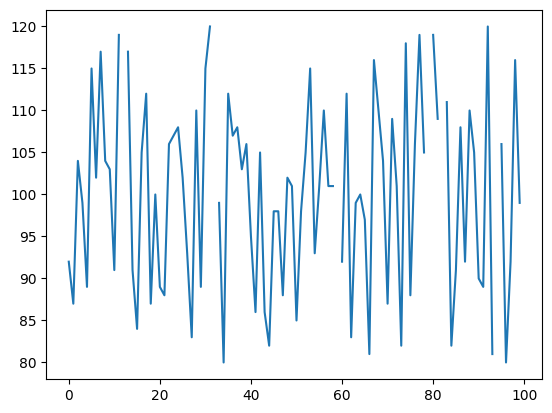

In [2]:
import pandas as pd
df = pd.read_csv('csv files/manual_vs_auto.csv')

#Pandas works with Matplotlib in the background. SO we don't have to import Pyplot for basic plotting.

df['Manual'].plot()

<Axes: title={'center': 'Manual Count'}, ylabel='Frequency'>

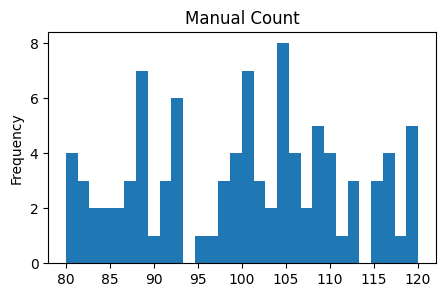

In [ ]:
# To plot single histogram based on single value

df['Manual'].plot(kind = 'hist', title = 'Manual Count', bins = 30, figsize=(5,3))

<Axes: >

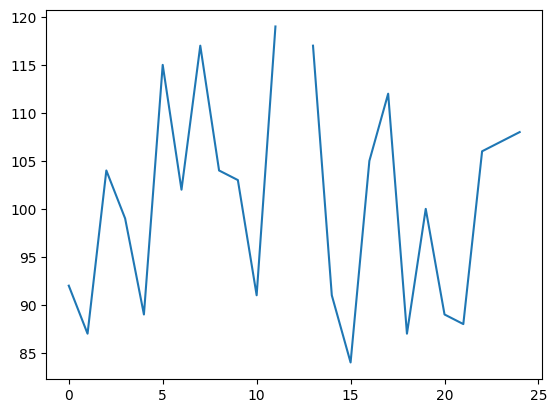

In [10]:
# Plot only Set1 data

df = df.rename(columns = {'Unnamed: 0':'Image_set'})
set1_df = df[df['Image_set'] == 'Set1']
set1_df['Manual'].plot()

<Axes: >

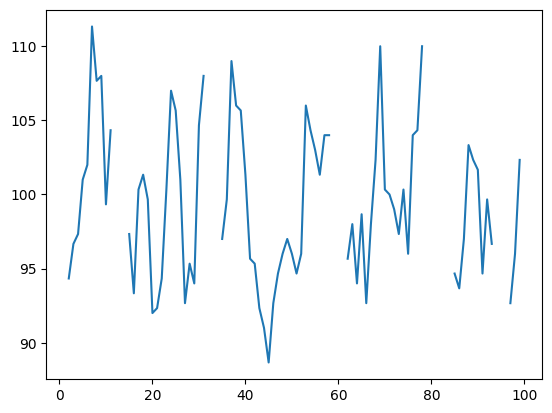

In [11]:
df = pd.read_csv('csv files/manual_vs_auto.csv')

#Change Unnamed: 0 name to Image_set
df = df.rename(columns = {'Unnamed: 0':'Image_set'})

# Sometimes you need to smooth data for better visualization. One way to Smooth is by averaging few points 
df['Manual'].rolling(3).mean().plot()  #Much nicer plot.

#Can do rolling mean or sum or anything else that makes sense.
#Some disconnects, let's not worry about it for now.

count     94.000000
mean     100.021277
std       11.285140
min       80.000000
25%       90.250000
50%      101.000000
75%      108.000000
max      120.000000
Name: Manual, dtype: float64


<Axes: >

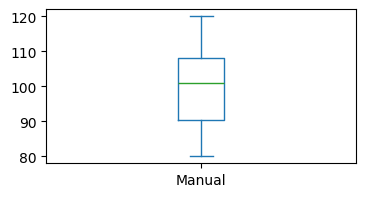

In [ ]:
# We can also graphically represent the statistics. 

print(df['Manual'].describe())

df['Manual'].plot(kind='box', figsize=(4,2))    # Shows max and min values, outliers, etc.

<Axes: xlabel='Manual', ylabel='Auto_th_2'>

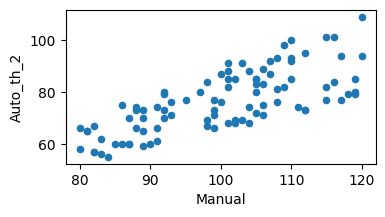

In [19]:
# In order to plot the relationship between Columns, we typically generate scatter plots
df.plot(kind='scatter', x='Manual', y='Auto_th_2', figsize=(4,2))

  Image_set   Image  Manual  Manual2  Auto_th_2  Auto_th_3  Auto_th_4 high_low
0      Set1  Image1    92.0     93.0         70         87         82      low
1      Set1  Image2    87.0     83.0         60         85         83      low
2      Set1  Image3   104.0     98.0         74         99         94     high
3      Set1  Image4    99.0      NaN         73        101        109      low
4      Set1  Image5    89.0      NaN         59         90         67      low


<Axes: title={'center': 'Manual'}, xlabel='high_low'>

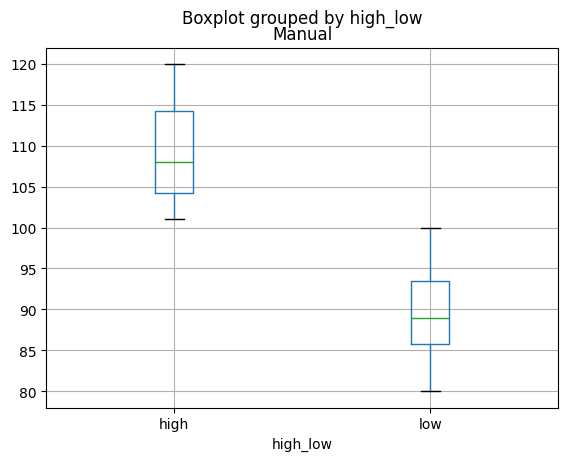

In [22]:
#### Using functions and creating Caterogries and plotting

# Now, Let's go through an exercise where we define all cell counts below 100 as low and above as high. Then let's plot using the new categories we defined.

import pandas as pd
df = pd.read_csv('csv files/manual_vs_auto.csv')
df = df.rename(columns = {'Unnamed: 0':'Image_set'})

def cell_count(x):
    if x <= 100.0:
        return "low"
    else:
        return "high"
    
#Now we want to send the entire Manual column through this function, which is what apply() does:
#Start by defining a new column title cell_count_index
#Then just apply the function to categorize counts into low and high.

df['high_low'] = df['Manual'].apply(cell_count)
print(df.head())

# we can plot by combining this cell count index information
df.boxplot(column='Manual', by='high_low')